# Getting started with Julia

Julia is known as a programming language that has been designed for combining (high) performance and productivity. The initial design of Julia was started about 2009, and a first beta version was launched around 2012 (well before I got aware of it). Since then, the **Julia community** has grown very rapidly. While Julia has been developed as a general-purpose language for many different applications, its central features are well suited for high-performance numerical analysis and computational science, and as required especially for modelling quantum many-particle systems. Indeed, Julia comprises a very careful design and a good number of modern technologies that enables the user to gradually learning modern concepts in scientific computing.

Julia offers various features that are otherwise just known from (so-called) *productivity languages*, including rapid development cycles; exploratory programming without the need to type declarations and memory management; language extensibility via multiple dispatch as well as various features for meta-programming and parallelization. In particular, Julia provides the user with dynamic typing, automatic garbage collection as well as a type-specializing *just-in-time* compilation of code, and which enables one to port code to other platforms with only moderate adaptions. With the rapid growth of the Julia user community, there has been developed a large number of tutorials https://julialang.org/learning/ which help the user to get started.

The modern features of Julia are quite *in contrast* to the codes that are currently applied in **computational atomic physics** or, more generally, in atomic, molecular and optical (AMO) physics. Mainly for historical reason (and the existence of more or less powerful codes), most atomic computations make still use of Fortran or C. Since atomic structure (and collision) theory has been developed parallel with Fortran, a large (or even huge) amount of Fortran code exists and is applied by the community, a situation with sometimes undesired consequences: Newcomers to computional atomic or AMO either have to *learn* the basics about Fortran programming or, *vice versa*, begin to belief that both, (the use of) Fortran and atomic physics are old-fashioned. From a physics viewpoint, however, the opposite is true: Until the present, **atomic pyhsics has proven to be a great playground** for developing new ideas, concepts or theoretical methods in quantum many-particle physics. With the design of the **Jena Atomic Calculator (JAC)**, I wish to show that atomic computations can be made simple and applied toward modern and emerging fields of physics. 

Here, we shall **not introduce** Julia's syntax and concepts for which many tutorials are available on the web. Instead, we just wish to remind and highlight some simple (syntax) features that help to go easier around with JAC, and especially for occasional users from experiment or teaching. This reminder aims to lower the initial *threshold* for users that have been trained on other languages in the past. Here, we shall *pick up* some issues whose physics background is explained only later in other tutorial. Obviously, however, Julia is a very rich and powerful language with many features that go well beyond of what is (and will ever) needed for JAC.

In brief, JAC provides tools for performing atomic (structure) calculations of different kind and complexity, and for which further details are given in the tutorials below. To see anything from JAC, we shall first invoke the tools by:

In [1]:
using JAC

a line that will appear at the beginning of all subsequent tutorials. -- A first powerful and frequently needed feature refers to Julia's help pages or just the "?". By typing, for instance, atom or computation

In [2]:
? atom

search: Atomic AtomicState AtomicStructure StartFromPrevious StartFromHydrogenic

Couldn't find atom
Perhaps you meant atan, acot, acos, htol, hton, ltoh, ntoh, Atomic or pathof


No documentation found.

Binding `atom` does not exist.


we see, that `atom` itself is not a well-defined term in the JAC toolbox but that there exists a number of related terms, such as `Atomic`, `AtomicState` (two modules of JAC) and others. We shall not enter here the modular structure of the JAC toolbox but start much simpler with: 

In [3]:
? Orbital

search: Orbital AbstractStartOrbitals PhotoRecombination MultipolePolarizibility



`struct  Radial.Orbital`       ... defines a type for a single-electron radial orbital function with a large and small component, and which can refer to         either the standard or an explicitly given grid due to the logical flag useStandardGrid. Bound-state orbitals with energy < 0 are          distinguished from free-electron orbitals by the flag isBound.

```
+ subshell        ::Subshell          ... Relativistic subshell.
+ isBound         ::Bool              ... Logical flag to distinguish between bound (true) and free-electron orbitals (false).
+ useStandardGrid ::Bool              ... Logical flag for using the standard grid (true) or an explicitly given grid (false).
+ energy          ::Float64           ... Single-electron energies of bound orbitals are always negative.
+ P               ::Array{Float64,1}  ... Large and ..
+ Q               ::Array{Float64,1}  ... small component of the radial orbital.
+ Pprime          ::Array{Float64,1}  ... dP/dr.
+ Qprime          ::Array{Float64,1}  ... dQ/dr.
+ grid            ::Array{Float64,1}  ... explic. defined radial grid array for P, Q, if StandardGrid = false.
```

---

`Radial.Orbital(subshell::Subshell, energy::Float64)`       ... constructor for given subshell and energy, and where useStandardGrid is set to true; the grid must be defined          explicitly and neither the large and small components nor their derivatives are yet defined in this case.

---

`Radial.Orbital(label::String, energy::Float64)`       ... constructor for given string identifier and energy, and where useStandardGrid is set to true; the grid must be          defined explicitly and neither the large and small components nor their derivatives are yet defined in this case.


which, apart from its formal meaning, is a particular data structure (`struct`) of JAC and which represents a relativistic orbital (function) including additional information that appears helpful in the given implementation. There are very many (say, more than 300) of such data struct's specified in the JAC toolbox, and thus quite obvious that nobody will remember the details of all these definitions. Indeed, the "?" is the right and a powerful means to remind yourself and make use of these data structures whenever necessary. Special care has been taken that all data structures and functions/methods comes with a reasonable explanation (docstring) in order to work efficiently with JAC. (**Hint:** If, in JupyterLab, the printout of some code cell in is too wide, you can make the font smaller/larger by <ctrl> -/+).

For instance, we might ask of what can be *added* to each other in JAC:

In [4]:
? add

search: add addenv readdir muladd rad2deg AbstractQedModel



`Basics.add(ma::AngularM64, mb::AngularM64)`       ... adds the projections of the angular momenta ma + mb and returns a mc::AngularM64.

---

`Basics.add(pota::Radial.Potential, potb::Radial.Potential)`       ... to add two radial potentials together that are defined on the same grid. A potential::RadialPotential is returned          that inherits its radial size from the potential that is defined in a larger range of r-values.


Apart from a short explanation, these docstring always tell the user (i) in which module the method is defined; (ii) which arguments it takes, including Julia's *multiple dispatch* feature as well as (iii) the type of the return value. All these information are typically relevant to the user, especially if some input or output does not behave as it should. Indeed, the complexity can grow quite rapidly, for instance, if we ask for help of what we can `generate`:

In [4]:
? generate

search: generate @generated



`Basics.generate(representation::AtomicState.Representation)`       ... to generate an atomic representation as specified by the representation.repType::AbstractRepresentationType.         All relevant intermediate and final results are printed to screen (stdout). Nothing is returned.

`Basics.perform(representation::AtomicState.Representation; output=true)`       ... to generate the same but to return the complete output in a dictionary; the particular output depends on the type and          specifications of the representation but can easily accessed by the keys of this dictionary.

---

`Basics.generate(repType::AtomicState.MeanFieldBasis, representation::AtomicState.Representation)`       ... to generate a mean-field basis (representation) for a set of reference configurations; all relevant intermediate          and final results are printed to screen (stdout). Nothing is returned.

`Basics.generate(repType::AtomicState.MeanFieldBasis, representation::AtomicState.Representation; output=true)`       ... to generate the same but to return the complete output in a dictionary; the particular output depends on the type and          specifications of the representation but can easily accessed by the keys of this dictionary.

---

`Basics.generate(repType::AtomicState.OneElectronSpectrum, representation::AtomicState.Representation)`       ... to generate a one-electron spectrum for the atomic potential from the (given) levels, based on a set of reference          configurations as well as for given settings. Relevant intermediate and final results are printed to screen (stdout).          Nothing is returned in this case.

```
+ `(repType::AtomicState.OneElectronSpectrum, representation::AtomicState.Representation; output=true)`  
... to generate the same but to return the complete output in a orbitals::Dict{Subshell, Orbital}.
```

---

`Basics.generate(repType::AtomicState.CiExpansion, representation::AtomicState.Representation)`       ... to generate a configuration-interaction expansion for a single level symmetry and based on a set of reference configurations         and a number of pre-specified steps. All relevant intermediate and final results are printed to screen (stdout).          Nothing is returned.

`Basics.generate(repType::AtomicState.CiExpansion, representation::AtomicState.Representation; output=true)`       ... to generate the same but to return the complete output in a dictionary; the particular output depends on the type and          specifications of the computations but can easily accessed by the keys of this dictionary.

---

`Basics.generate(repType::AtomicState.RasExpansion, representation::AtomicState.Representation)`       ... to generate a restricted active-space expansion for a single level symmetry and based on a set of reference configurations         and a number of pre-specified steps. All relevant intermediate and final results are printed to screen (stdout).          Nothing is returned.

`Basics.generate(repType::AtomicState.RasExpansion, representation::AtomicState.Representation; output=true)`       ... to generate the same but to return the complete output in a dictionary; the particular output depends on the type and          specifications of the computations but can easily accessed by the keys of this dictionary.

---

`Basics.generate(repType::AtomicState.GreenExpansion, representation::AtomicState.Representation)`       ... to generate a Green (function) expansion for a given approach and excitation scheme of the electron,         based on a set of reference configurations, a list of level symmetries as well as for given settings.         All relevant intermediate and final results are printed to screen (stdout). Nothing is returned.

`Basics.generate(repType::AtomicState.GreenExpansion, representation::AtomicState.Representation; output=true)`       ... to generate the same but to return the complete output in a dictionary; the particular output depends on the type and          specifications of the representation but can easily accessed by the keys of this dictionary.

---

`Basics.generate("condensed multiplet: by single weight", multiplet::Multiplet)`       ... to condense/reduce the number of CSF in the basis of the given multiplet due to a single 'weight';          a multiplet::Multiplet is returned.  **Not yet implemented !**

---

`Basics.generate("configuration list: NR, from basis", basis::Basis)`       ... to (re-) generate the list of NR configurations from the given basis; a confList::Array{Configuration,1} is returned.

---

`Basics.generate("configuration list: NR, single-configuration", refConf::Configuration, NoExcitations::Int64, fromShells::Array{Shell,1},`                  toShells::Array{Shell,1})       ... to generate a non-relativistic configuration list, including the given reference configuration (refConf) and with          all configurations that differ by NoExcitations from the fromShells into the toShells; an Array{Configuration,1}          is returned.

---

`Basics.generate("configuration list: relativistic", conf::Configuration)`       ... to split/decompose a non-relativistic configuration into an list of relativistic ConfigurationR[]. The proper          occupuation of the relativistic subshells is taken into account.

---

`Basics.generate("CSF list: from single ConfigurationR", conf::ConfigurationR, subshellList::Array{Subshell,1})`      ... to construct from a given (relativistic) configuration all possible CSF with regard to the subshell order as specified          by subshellList; a list::Array{CsfR,1} is returned.

---

`Basics.generate("shells: ordered list for NR configurations", confs::Array{Configuration,1})`       ... to generate for confs, i.e. all the given (non-relativistic) configurations, a common and ordered shell list;          a list::Array{Shell,1} is returned.

---

`Basics.generate("subshells: ordered list for relativistic configurations", confs::Array{ConfigurationR,1})`       ... to generate for confs, i.e. all the given (relativistic) configurations, common and ordered subshell list;          a list::Array{Subshell,1} is returned.

---

`Basics.generate("subshells: ordered list for two bases", basisA::Basis,  basisB::Basis)`       ... to generate common and ordered subshell list for the two basis A and B; a list::Array{Subshell,1} is returned.

---

`Basics.generate("single-electron spectrum: STO", N::Int64, potential::Radial.Potential, grid::Radial.Grid; N_0::Int64=30, alpha_0::Float64=1.0,                  beta_0::Float64=1.1)`      ... to generate a complete one-electron spectrum with N positive and N negative states, and by using even-tempered Slater-type          orbitals (STO) with parameters $lpha_i = lpha_0 eta_0^i$; a spectrum::SingleElecSpectrum is returned where just          N0 positive and N_0 negative are kept for later use.  **Not yet implemented !**

`Basics.generate("single-electron spectrum: STO, positive", N::Int64, potential::Radial.Potential, grid::Radial.Grid; N_0::Int64=30, alpha_0::Float64=1.0,                  beta_0::Float64=1.1)`       ... to generate the same but to return only the N_0 positive states.  **Not yet implemented !**


Well, this is quite a lot, and we shall explain some of these methods below; a similar or even larger output, you can generate by `? perform` as well as few other terms that are central to the implementation of JAC.

**Constructors & program control:$\quad$** Another frequent use of the (help) "?" concerns the data flow and control of almost all computations. In JAC, we often make use of (so-called) `Settings` that enable the user to overwrite default values or to *control* the computation to the extent, he or she wishes to have control. These `Settings` are context dependent and are different for each atomic property or process that can be computed by the JAC toolbox. They are defined in the various modules and need to be specified accordingly. For instance, to control the computation of transition probabilities for the (fine-structure) levels between given initial- and final-state configuration, one has to overwrite the (defaults) settings:

In [6]:
? PhotoEmission.Settings

`struct  PhotoEmission.Settings  <:  AbstractProcessSettings`       ... defines a type for the details and parameters of computing radiative lines.

```
+ multipoles              ::Array{EmMultipoles}     ... Specifies the (radiat. field) multipoles to be included.
+ gauges                  ::Array{UseGauge}         ... Gauges to be included into the computations.
+ calcAnisotropy          ::Bool                    ... True, if the anisotropy (structure) functions are to be 
                                                        calculated and false otherwise 
+ printBefore             ::Bool                    ... True, if all energies and lines are printed before comput.
+ lineSelection           ::LineSelection           ... Specifies the selected levels, if any.
+ photonEnergyShift       ::Float64                 ... An overall energy shift for all photon energies.
+ mimimumPhotonEnergy     ::Float64                 ... minimum transition energy for which (photon) transitions 
                                                        are included into the computation.
+ maximumPhotonEnergy     ::Float64                 ... maximum transition energy for which (photon) transitions 
                                                        are included.
```

---

`PhotoEmission.Settings()`  ... constructor for the default values of radiative line computations

---

`PhotoEmission.Settings(set::PhotoEmission.Settings;`

```
    multipoles::=..,        gauges=..,          calcAnisotropy=..,          printBefore=..,
    line=..,                selectedLines=..,   photonEnergyShift=..,       mimimumPhotonEnergy=.., 
    maximumPhotonEnergy=..) 
                
... constructor for modifying the given PhotoEmission.Settings by 'overwriting' the previously selected parameters.
```


Apart from the standard constructor (cf. Julia), JAC provides two additional constructors to either define the default values:

In [7]:
PhotoEmission.Settings()

multipoles:             EmMultipole[E1]  
gauges:                 UseGauge[UseCoulomb]  
calcAnisotropy:         false  
printBefore:            false  
lineSelection:          Inactive LineSelection.  
photonEnergyShift:      0.0  
mimimumPhotonEnergy:    0.0  
maximumPhotonEnergy:    10000.0  


or to overwrite them conviniently by some proper keywords; see other tutorials below. --- Although the photo emission and excitation (absorption) processes are closely related to each other, the settings will be different since the excitation processes are generally affected also by the properties of the incident radiation:

In [8]:
? PhotoExcitation.Settings

`struct  PhotoExcitation.Settings  <:  AbstractProcessSettings`  ... defines a type for the details and parameters of computing photo-excitation  lines.

```
+ multipoles              ::Array{EmMultipole,1}    ... Specifies the multipoles of the radiation field that are to be included.
+ gauges                  ::Array{UseGauge,1}       ... Specifies the gauges to be included into the computations.
+ calcForStokes           ::Bool                    ... True, if the excitation cross sections are to be calculated (and false otherwise)
                                                        for given Stokes parameter of the incident plane-wave photons.
+ calcPhotonDm            ::Bool                    ... True, if the photon density matrix of a subsequently emitted fluorescence photon 
                                                        is to be calculated and false otherwise. 
+ calcTensors             ::Bool                    ... True, if statistical tensors of the excited atom are to be calculated, false otherwise. 
+ printBefore             ::Bool                    ... True, if all energies and lines are printed before their evaluation.
+ lineSelection           ::LineSelection           ... Specifies the selected levels, if any.
+ photonEnergyShift       ::Float64                 ... An overall energy shift for all photon energies.
+ mimimumPhotonEnergy     ::Float64                 ... minimum transition energy for which (photon) transitions are included into the
                                                        computation.
+ maximumPhotonEnergy     ::Float64                 ... maximum transition energy for which (photon) transitions are included.
+ stokes                  ::ExpStokes               ... Stokes parameters of the incident radiation.
```

---

`PhotoExcitation.Settings()`  ... 'empty' constructor for the default values of photo-excitation line computations

---

`PhotoExcitation.Settings(set::PhotoExcitation.Settings;`

```
    multipoles=..,          gauges=..,                  calcForStokes=..,           calcPhotonDm=..,    
    calcTensors=..,         printBefore=..,             lineSelection=..,    
    photonEnergyShift=..,   mimimumPhotonEnergy=..,     maximumPhotonEnergy=..,     stokes=..)
                
... constructor for modifying the given PhotoExcitation.Settings by 'overwriting' the previously selected parameters.
```


We shall meet these and (many) other settings quite often in the tutorials below. --- Beside of Julia's help features (?), however, it is sometimes difficult to remember the right term or function name. In this case, it easy to make a <double-tab> after the dot (notation) or to make use of the (Unix/Linux) `grep` command within the `JAC/src` directly. Similar line-search commands will exist also at other platforms. In particular, for those of you who wishes to support and extend the JAC toolbox, the dot expansion and the `grep` command will be found very helpful, perhaps more than other search tools.

**Use of constructors:$\quad$** Another Julia feature, that is frequently applied in JAC, is the successive definition of constructors in order to set-up complex data structures. This features is applied, for instance, in order to define an `Atomic.Computation` or a `Cascade.Computation` as a whole. We shall explain these rather complex data types below in different tutorials. The same issue appears however already at a much simpler level. For example, if we wish to select (specify) a number of levels from a multiplet prior to some particular -- configuration interaction -- computation, we can make use of a

In [9]:
? LevelSelection

search: LevelSelection



`struct  Basics.LevelSelection`       ... defines a struct to specify a list of levels by means of their (level) indices or level symmetries.

```
+ active       ::Bool                     ... true, if some selection has been made.
+ indices      ::Array{Int64,1}           ... List of selected indices.
+ symmetries   ::Array{LevelSymmetry,1}   ... List of selected symmetries
```

---

`Basics.LevelSelection()`  ... constructor for an inactive LevelSelection.

---

`Basics.LevelSelection(active::Bool; indices::Array{Int64,1}=Int64[], symmetries::Array{LevelSymmetry,1}=LevelSymmetry[])`       ... constructor for specifying the details of a LevelSelection.


Apart from the logical flag `active`, such a level selection requires to either specify a list of level numbers (indices) or *level symmetries*

In [10]:
LevelSelection(true, indices= [i for i in 1:11])

LevelSelection:  indices = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11];    symmetries = LevelSymmetry[].

In [11]:
LevelSelection(true, symmetries= [LevelSymmetry(1//2, Basics.plus)])

LevelSelection:  indices = Int64[];    symmetries = LevelSymmetry[1/2 +].

Here, we made use of a LevelSymmetry to specify the overall rotational $J^P$ symmetry of atomic levels.

In [12]:
? LevelSymmetry

search: LevelSymmetry



`struct  Basics.LevelSymmetry`  ... defines a struct for defining the overall J^P symmetry of a level.

```
+ J          ::AngularJ64  ... total angular momentum of a level
+ parity     ::Parity      ... total parity of the level
```

---

`Basics.LevelSymmetry(rational::Rational{Int64}, parity::Parity)`  ... constructor for a given (Rational,Parity).

---

`Basics.LevelSymmetry(i::Int64, parity::Parity)`  ... constructor for a given (Int64,Parity).

---

`Basics.LevelSymmetry(rational::Rational{Int64}, sa::String)`  ... constructor for a given (Rational,String).

---

`Basics.LevelSymmetry(i::Int64, sa::String)`  ... constructor for a given (Int64,String).

---

`Basics.LevelSymmetry(subsh::Subshell)`  ... constructor for a given (Subshell).


As seen from this definition, the level symmetry just comprises the total angular momentum (of type `AngularJ64`) and the parity of the level (of type `Parity`). Therefore, the specification of a list of level symmetries in `LevelSelection` already requires to nest four constructors in order make the level selection explicit: (i) For the angular momentum, (ii) the parity, (iii) the level symmetry and (iv) to create a list (array) of such level symmetries. All the constructors can be specified and built together also in subsequent steps, such as:

In [13]:
J1    = AngularJ64(1//2);           J2 = AngularJ64(5//2)  
pl    = Basics.plus;                mn = Basics.minus
lsym1 = LevelSymmetry(J1, pl);      lsym2 = LevelSymmetry(J2, mn)
levelsyms = [lsym1, lsym2]

2-element Vector{LevelSymmetry}:
 1/2 +
 5/2 -

or simply by *nesting* all the information within a single step

In [14]:
levelsyms = [LevelSymmetry(AngularJ64(1//2), Basics.plus), LevelSymmetry(AngularJ64(5//2), Basics.minus)]

2-element Vector{LevelSymmetry}:
 1/2 +
 5/2 -

Both way have their pros and cons, and often some *mixture* is applied where complex constructors are first assigned to some variables, and which are later utilized to built up constructors of higher complexity. --- To finally specify aǹ instance of a `LevelSelection`, we use (onc more) its second constructor above:

In [15]:
LevelSelection(true, indices=[1,2,3], symmetries=levelsyms)

LevelSelection:  indices = [1, 2, 3];    symmetries = LevelSymmetry[1/2 +, 5/2 -].

and which will tell the JAC program to compute the lowest three levels (1, 2, 3) as well as all levels with 1/2+ and 5/2- symmetry. Apart from the selection of individual levels, it is often helpful for the computation of atomic processes to make a prior `LineSelection` and in some cases even a `PathwaySelection` as, for instance, for dielectronic recombination processes. Some of these features will be explained below in subsequent tutorials of JAC:

**Functions & methods:$\quad$** Like most other languages, Julia is based on the successive work through functions and methods; a **function** is first of all specified by its name and it maps a tuple of argument values upon a return value. For instance, the function

In [16]:
function addSomething(a, b)
    c = a + b
end

addSomething (generic function with 1 method)

In [17]:
addSomething(3.1, 5//2)

5.6

can be used to *add* two numbers, rather independent of their particular type, and which are *infered* here automatically. However, additional type declarations might help to *specialize* a function and to ensure **type stability**:

In [18]:
function addSomething(a::Int64, b::Int64, c::Int64)
    d = a + b + c
end

addSomething (generic function with 2 methods)

While the function name is the same in both of these examples above, Julia carefully distinguishes between these two **methods** of the function `addSomething` that may differ by the type *and/or* the number of arguments. This multiple *use* **(dispatch)** of function name enables the user to write highly specialized code. Although a proper (and specialized) definition of functions is often very important for the performance of the program, we shall not discuss such technical issues here. Let us just mention, that a function/method may also return `nothing`:

In [19]:
nothing

In [20]:
typeof(nothing)

Nothing

In JAC, the value `nothing` is usually returned by all *display* functions that print some selected data or tabulation to screen or elsewhere but does not return a value otherwise.

**Code failures:$\quad$** Beside of its large flexibility and user-friendliness, JAC might terminate from time to time for *non-obvious* reasons. Since JAC is first of all a *physics code*, no attempt has been made that all possible errors are fully captured and recovered by the program. Wrong input parameters or an inappropriate use of contructors will often lead to errors that cannot be resolved by the program. While some of this input can be readily recognized as wrong, and then lead to a proper error message, other wrong data may appear dynamically and cannot be captured with a reasonable overhead of the code.  In JAC, therefore, several conditional `if ... elseif ... else ... end` blocks include an additional clause `error("stop a")` or similar; these are clauses, which due to a first design of a function should never be entered, but this appears not to be true in all cases. The use of these (fully) *non-instructive* error message have still a great advantage due to Julia: If not switched-off explicitly, Julia always reports for all program failures the hierarchy of call's, that are made before the error occurs, and lists these calls together with the file and line number of source code. For this reason, an `error("stop a")` readily shows the position where something unexpected occurs. A short inspection of the corresponding (line of the) source code often help to understand of what went wrong internally.

**Julia macros:$\quad$**  What can one do, if the (source) code itself does not tell so much about the problem ? --- In this case, it is often useful to include some additional **printouts**  near to the line in question into the code and to re-run it again. There are different ways (`@show`, `print()`, `println()`) to place printout in the code; cf. https://julialang.org/learning/  A particular quick and useful way makes use of the Julia macro:

In [21]:
@show levelsyms

levelsyms = LevelSymmetry[1/2 +, 5/2 -]


2-element Vector{LevelSymmetry}:
 1/2 +
 5/2 -

which simply repeats the *names* of the variables together with their values. Of course, the values of several such variables can be shown within the same call:

In [22]:
wa = 5;   wb = [2.0, pi];   wc = ones(3)
@show wa, wb, wc

(wa, wb, wc) = (5, [2.0, 3.141592653589793], [1.0, 1.0, 1.0])


(5, [2.0, 3.141592653589793], [1.0, 1.0, 1.0])

Indeed, this `@show` macro makes printout very easy. There are many macros (all starting with `@`) in Julia which need not to be considered here. We just mention that `@time` in front of a Julia command (block) will take and display the CPU time that is necessary to run this line(s):

In [23]:
@time rand(50000)

  0.000040 seconds (2 allocations: 390.703 KiB)


50000-element Vector{Float64}:
 0.7142560681659618
 0.1859724233036335
 0.5012457458368405
 0.5962623459456982
 0.4639347340465185
 0.6758936722505902
 0.6791455028452258
 0.29287047511657893
 0.6024768483682994
 0.13025607260547245
 0.9887197151248417
 0.1630406546687886
 0.2428626236163105
 ⋮
 0.3119415479184604
 0.3323193403977964
 0.8801270380659723
 0.40774908761226647
 0.4922465827267155
 0.12471324705129194
 0.23364365515329744
 0.6926315898830004
 0.11999116058968862
 0.8816782466258024
 0.9309047401807222
 0.4495182763330756

**Graphics & plots:$\quad$** One of the powerful features of Julia, finally, is (or could be) its fast and efficient use of graphical representations. In JAC, we wish to make explicit use of such graphical elements, although not too many high-level `plot` methods are yet prepared. Here, we just wish to briefly remind the user that by

In [24]:
using PyPlot

one can easily draw (colorful) plots of different dimension. While this is a topic by its own, we make partly use of PyPlot in JAC with the aim to prepare specialized methods that help display the data from complex data structs, such as orbitals, (radial) potentials or synthetic spectra. However, since `PyPlot` is a very large (and rather slow package, it is never loaded automatically but need to called explictly by the user. -- Having `PyPlot`available, one can easily display a number of
random values, even if the output is not so instructive. We encourage the user to draw more useful plots:

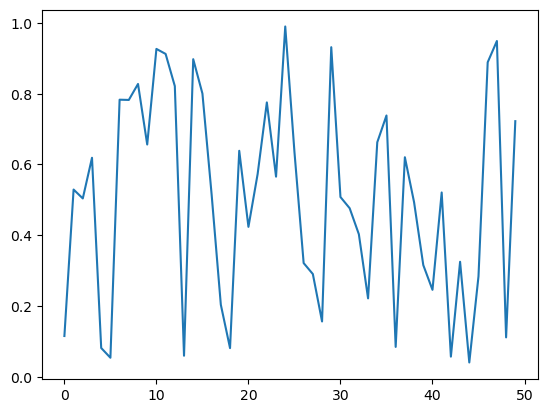

In [25]:
r = rand(50); plot(r); show()

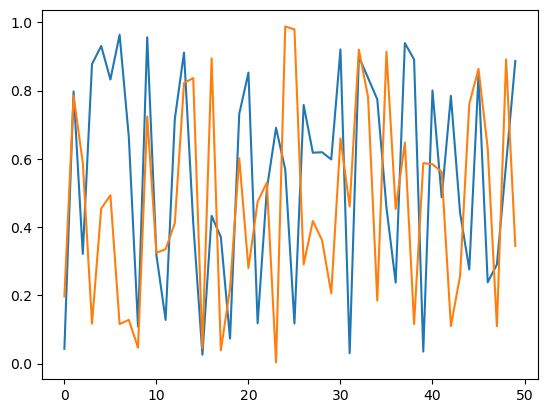

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7efca341bca0>

In [26]:
r = rand(50); s = rand(50); plot(r); plot(s)